In [5]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

# Import the stats library from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [61]:
#opening the csv downloaded from kaggle
tatanic_df = pd.read_csv('train.csv',sep=',')
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
#overall dataset of titanic
tatanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Questions:

1) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)                                                
2) What deck were the passengers on and how does that relate to their class?                                        
3) Where did the passengers come from?                                                                                          
4) Who was alone and who was with family?                                                                           
5) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?       
6) Did having a family member increase the odds of surviving the crash?





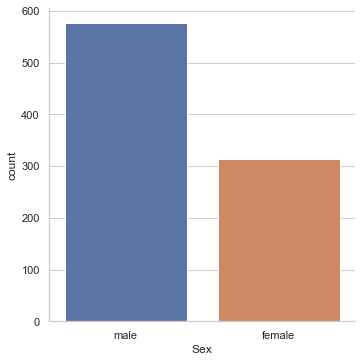

In [63]:
#1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)

#check gender of passengers
sns.catplot(data=tatanic_df,x='Sex',kind='count')

conclusion: It is clear that there are men twice the number of women

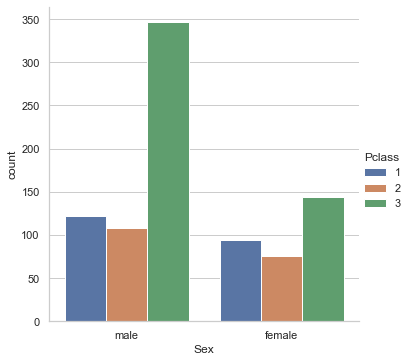

In [64]:
#check pclass of passengers and gender
sns.catplot(data=tatanic_df,x='Sex',kind='count',hue='Pclass')

conclusion: the men in third class is surprisely twice as much as other class.

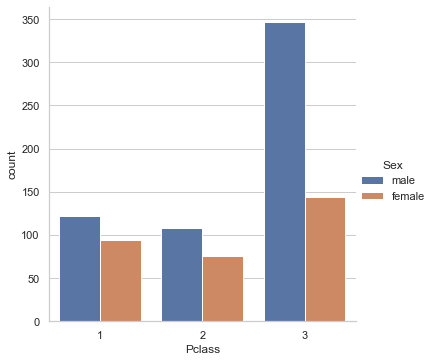

In [65]:
#reverse it for more clear pclass and gender
sns.catplot(data=tatanic_df,x='Pclass',kind='count',hue='Sex')

conclusion: it is clear that there are more people in Pclass than other classes

In [66]:
#Lets go to Ages analysis

#We will categorize into male, female and also child

#for male, female and also children(function)
#if the age is less than 16 make it a child
def male_female_child(passenger):
    age,sex = passenger

    if age < 16:
        return 'child'
    else:
        return sex

In [67]:
#add the person col for male, female and children
tatanic_df['Person'] = tatanic_df[['Age','Sex']].apply(male_female_child,axis=1)
tatanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


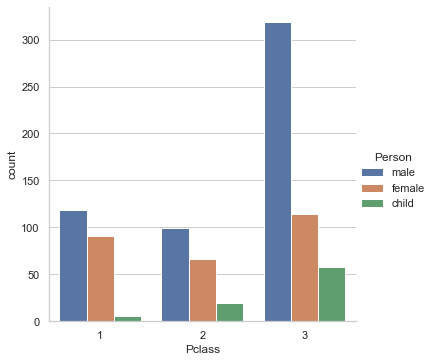

In [68]:
#check male, female and children
sns.catplot(data=tatanic_df,x='Pclass',kind='count',hue='Person')

conclusion: there are also more children in 3rd class than the other two and the children in 1st class is significantly lowest

<AxesSubplot:>

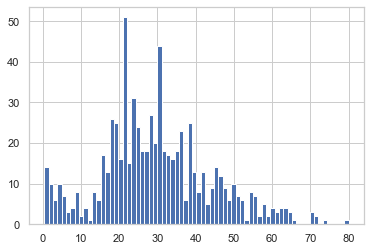

In [69]:
#cheking all the age 
tatanic_df['Age'].hist(bins=70) 

conclusion: most people are between the age of 20 and 30. 22 years old people are highest with around 50

In [70]:
#check average age of people
tatanic_df['Age'].mean() 

29.69911764705882

In [71]:
#check how many male,female and children
tatanic_df['Person'].value_counts() 

male      537
female    271
child      83
Name: Person, dtype: int64

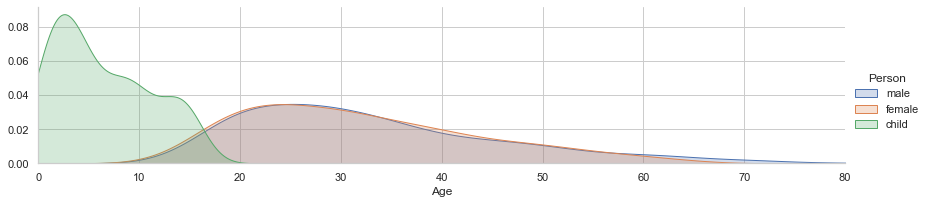

In [72]:
#to check male,female,children with age
Figure = sns.FacetGrid(data=tatanic_df,hue='Person',aspect=4) #aspect=size
Figure.map(sns.kdeplot,'Age',shade=True)

oldest = tatanic_df['Age'].max()

Figure.set(xlim=(0,oldest))

Figure.add_legend() #for labels

conclusion: there is no age difference in male and female

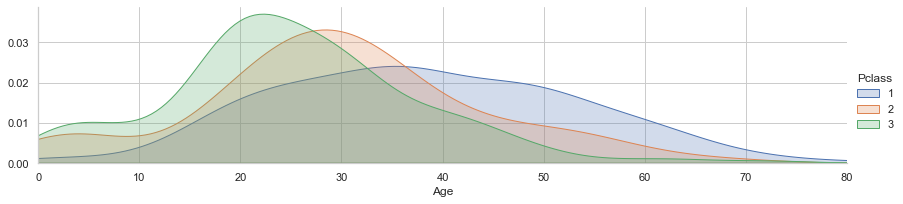

In [73]:
#to check Pclass with age
Figure = sns.FacetGrid(data=tatanic_df,hue='Pclass',aspect=4)

Figure.map(sns.kdeplot,'Age',shade=True)

oldest = tatanic_df['Age'].max()

Figure.set(xlim=(0,oldest))

Figure.add_legend() #for labels

conclusion: In class 2 and 3, most people are 20-30 years old and in class 1, most people are 30-40 years old

In [74]:
#2.) What deck were the passengers on and how does that relate to their class?
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [75]:
#for making deck column from cabin numbers
#removing null from Cabin
deck = tatanic_df['Cabin'].dropna() 
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

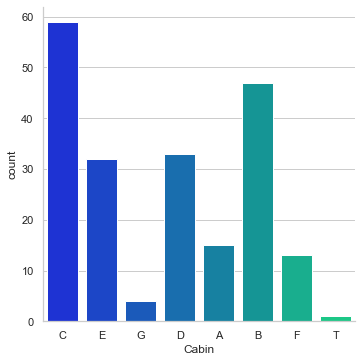

In [76]:
#categorize deck levels and make a plot
levels = []

for level in deck:
    levels.append(level[0]) #adding first item in that string to levels list

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot(data=cabin_df,x='Cabin',kind='count',palette='winter')

conclusion: C deck has the most people included among others which is nearly 60 people

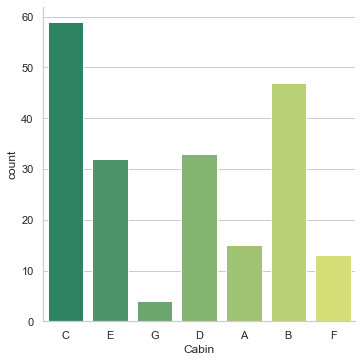

In [77]:
#drop the T deck since it is so low
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot(data=cabin_df,x='Cabin',kind='count',palette='summer')

In [78]:
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

In [79]:
#3.) Where did the passengers come from?

#change all the C,Q,and S to Cherbourg, Queenstown, Southhampton
tatanic_df['Embarked'].replace(['C','Q','S'],['Cherbourg','Queenstown','Southhampton'],inplace=True)
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton,male


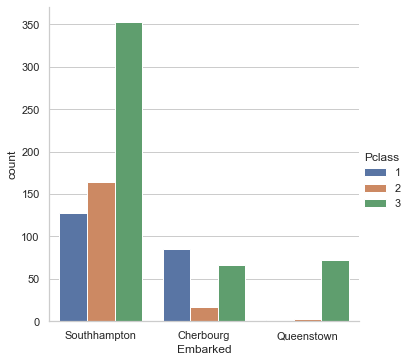

In [80]:
#check where did the passenger from Pclass come from
sns.catplot(data=tatanic_df,x='Embarked',kind='count',hue='Pclass',row_order=['C','Q','S'])

Queenstown passengers are mostly in 3rd class, we can say that the economics in queenstown is low

In [81]:
#4.) Who was alone and who was with family?
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton,male


In [91]:
#check family members
tatanic_df['Family'] = tatanic_df['SibSp'] + tatanic_df['Parch'] 
tatanic_df['Family']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Family, Length: 891, dtype: int64

In [92]:
#categories two categories
tatanic_df['Family'].loc[tatanic_df['Family'] > 0] = 'With Family' #if greater than 0, set With Family

tatanic_df['Family'].loc[tatanic_df['Family'] == 0] = 'Alone' #if greater than 0, set Alone

tatanic_df['Family']

C:\Users\Hein Lin Htet\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Family, Length: 891, dtype: object

In [84]:
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female,Family
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton,male,Family


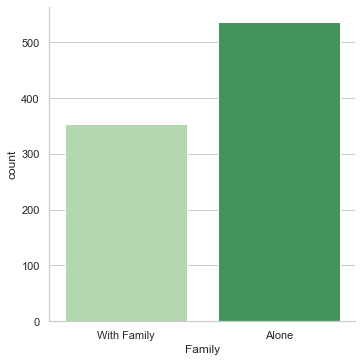

In [100]:
#check the family with plot
sns.catplot(data=tatanic_df,x='Family',kind='count',palette='Greens')

conclusion: there are more people without family members than people with family members

In [101]:
#5.) What factors helped someone survive the sinking?
#make survivor column to know if he/she survived or not instead of 0 and 1 
tatanic_df['Survivor'] = tatanic_df['Survived'].map({0:'no',1:'yes'})
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton,male,Alone,no


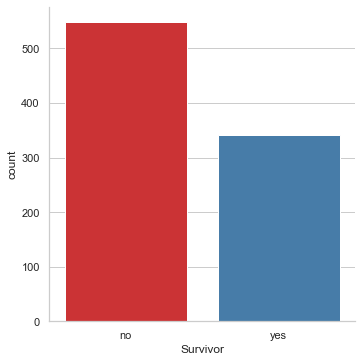

In [102]:
#check the survivors with plot
sns.catplot(data=tatanic_df,x='Survivor',kind='count',palette='Set1')

conclusion: there are more people who didn't survived compared to survivors

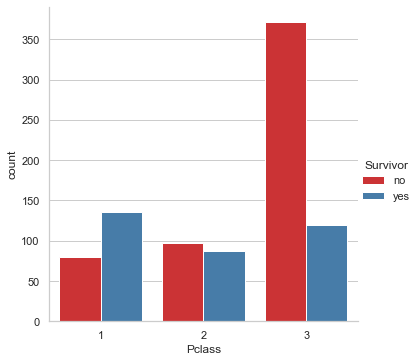

In [103]:
#check the survivors with plot including pclass
sns.catplot(data=tatanic_df,x='Pclass',kind='count',hue='Survivor',palette='Set1')

conclusion: Surprisingly, a lot of people who didnt survived are from 3rd class with around 350 people

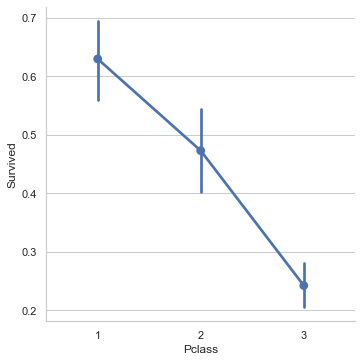

In [105]:
#check with point plot
sns.catplot(data=tatanic_df,x='Pclass',y='Survived',kind='point')

conclusion: the survival rate of people in 3rd class is so low and we can say that the survival rate depends on the classes

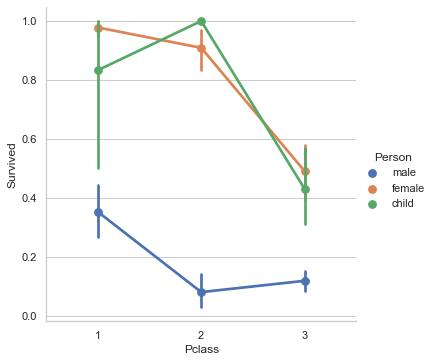

In [107]:
#check with class and also types of person
sns.catplot(data=tatanic_df,x='Pclass',y='Survived',hue='Person',kind='point')

conclusion: The survival rate of males are below 0.4(40%) in all classes. Females and children are in between 0.8(80%) and 1(100%) in all classes which means nearly all of them survived

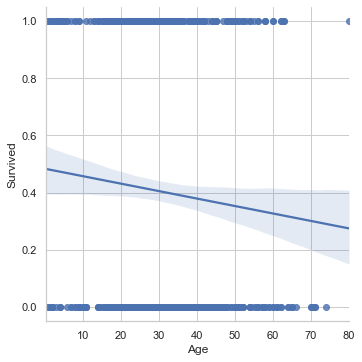

In [111]:
#check regression plot with age and survival 
sns.lmplot(data=tatanic_df,x='Age',y='Survived')

conclusion: the older one are not likely to survived since the line going down to older age

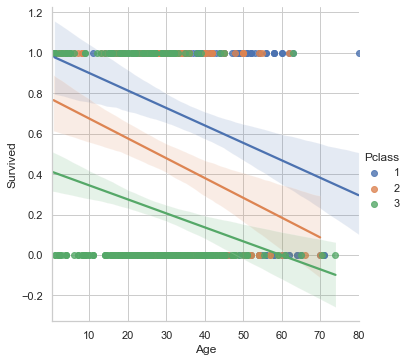

In [110]:
#age and survival and class check
sns.lmplot(data=tatanic_df,x='Age',y='Survived',hue='Pclass')

conclusion: we can clearly see the olders ages and the lower classes are not likely to survived than others

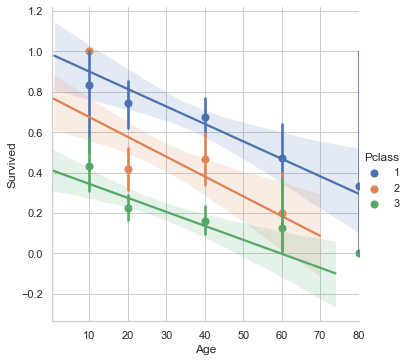

In [112]:
#make generation 10,20,40,60,80
generations = [10,20,40,60,80]

sns.lmplot(data=tatanic_df,x='Age',y='Survived',hue='Pclass',x_bins=generations)

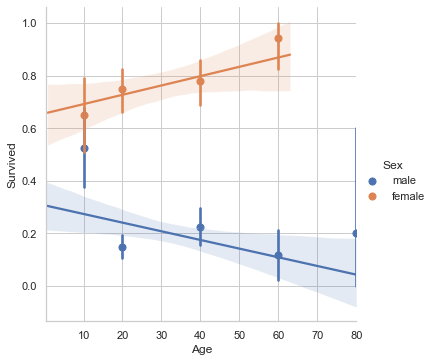

In [113]:
#check with gender and ages
sns.lmplot(data=tatanic_df,x='Age',y='Survived',hue='Sex',x_bins=generations)

conclusion: it is surprsing that although all women are likely to survived, the older women are more likely to survived. However, for men, the case is still the same like previous analysis.

In [118]:
#6.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southhampton,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southhampton,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southhampton,male,Alone,no


In [119]:
#Since there are NaN(null) values in Cabin, I will change it null into None since null cant be read to categorize for deck column
tatanic_df.fillna('None',inplace=True) #change all values to None

In [120]:
#NaN changed to None
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,Southhampton,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,Southhampton,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,Southhampton,male,Alone,no


In [121]:
#Get series from the cols of Canin column
deckq = tatanic_df['Cabin']
deckq.head()

0    None
1     C85
2    None
3    C123
4    None
Name: Cabin, dtype: object

In [122]:
#Make function for getting all the start letter of Cabin and put it into Deck 
decklist = []
for levels in deckq:
    decklist.append(levels[0])

deckframe = DataFrame(decklist)  #change in dataframe
deckframe.head()

,0
0,N
1,C
2,N
3,C
4,N


In [123]:
#put deck level into tatanic dataframe
tatanic_df['Deck'] = deckframe 
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,Southhampton,male,With Family,no,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,Southhampton,female,Alone,yes,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southhampton,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,Southhampton,male,Alone,no,N


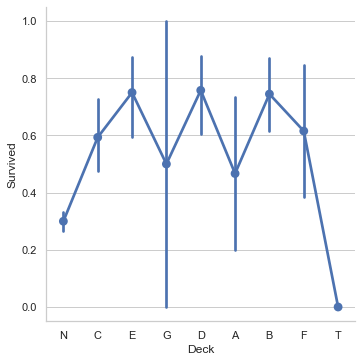

In [124]:
# recalling question 6
# 6.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?
sns.catplot(data=tatanic_df,x='Deck',y='Survived',kind='point')


conclusion: Since we dont need T and N values we will drop them from the plot 

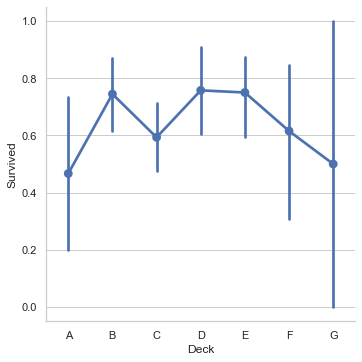

In [127]:
#dont show N and T cols
sns.catplot(data=tatanic_df,x='Deck',y='Survived',kind='point',order=['A','B','C','D','E','F','G'])

continue: decks A and G have lower survival rate than others

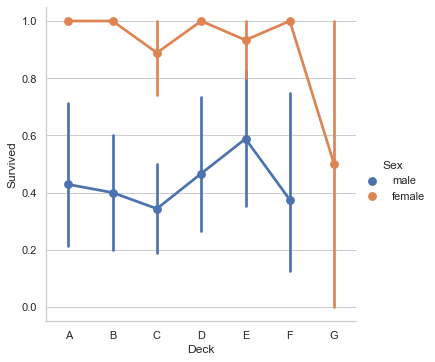

In [128]:
#check with gender 
sns.catplot(data=tatanic_df,x='Deck',y='Survived',hue='Sex',kind='point',order=['A','B','C','D','E','F','G'])

conclusion: It is surprising to see all the women have higher survival rate except in Gclass and all the people in Gclass are women. For the men, only E class has higher rate (60%) than the others which means just a little bit more than half of men survived.

In [59]:
#7.) Did having a family member increase the odds of surviving the crash?
tatanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S,male,With Family,no,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S,female,Alone,yes,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S,male,Alone,no,N


<AxesSubplot:xlabel='Family', ylabel='Survived'>

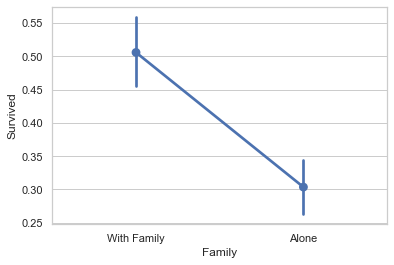

In [130]:
#check the survival rate and family with pointplot
sns.pointplot(data=tatanic_df,x='Family',y='Survived') #check with the pointplot

conclusion: the people with family members have higher survival rate (50% half of them) than the people with no family members which is 30%. We can say that this case also affects the survival rate.

<AxesSubplot:xlabel='Family', ylabel='Survived'>

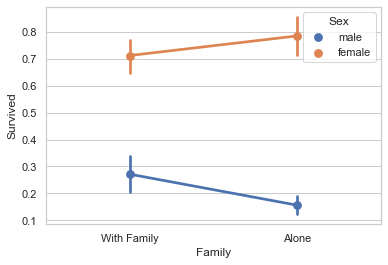

In [132]:
#check with gender
sns.pointplot(data=tatanic_df,x='Family',y='Survived',hue='Sex')

conclusion: it is surprising to see that the women without family members have slightly higher survival rate than the women who have family members

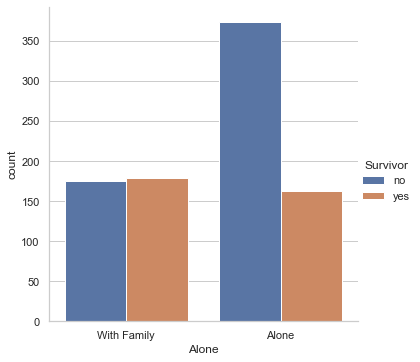

In [62]:
#check with the barplot
sns.catplot(data=tatanic_df,x='Alone',hue='Survivor',kind='count') 

bjblbbip